# ClimateWins – Exercise 2.2.2: RNN Model for Weather Pattern Prediction

## Table of Contents
1. Import Libraries
2. Load and Preview Dataset
3. Data Cleaning and Preprocessing
4. Export Cleaned Dataset
5. Reshape Data for RNN Input
6. Train-Test Split
7. Build RNN Model
8. Compile and Train Model
9. Evaluate Model Performance
10. Confusion Matrix and Results


# 2. Import Libraries

### Libraries for data handling, visualization, and building an RNN model using TensorFlow and Keras are imported.

In [1]:
# Data and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Deep learning (RNN/LSTM)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical


# 3. Load and Preview Dataset


The cleaned dataset exported from the previous notebook is loaded, and its structure is checked to ensure correctness.

In [2]:
# Load cleaned datasets created from Exercise 2.2.1
X = pd.read_csv("Cleaned-Weather-Data.csv")
y = pd.read_csv("Cleaned-Pleasant-Weather.csv")

# Display shapes and preview first few rows
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
X.head()


Shape of X: (28560, 135)
Shape of y: (22950, 15)


,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,7.0000,2.10,0.85,1.018,0.32,0.09,0.0000,0.70,6.5000,0.80,...,5.9000,3.00,2.60,0.73,1.0152,7.10,7.8000,4.0000,4.50,0.73
1,1.0304,0.48,0.01,2.300,-5.90,-8.50,-3.2000,5.00,1.0114,0.05,...,0.4000,8.60,7.50,9.90,7.0000,0.80,0.8600,1.0254,0.46,0.00
2,0.9000,9.80,7.40,12.200,6.00,0.72,0.6100,0.30,0.0000,5.10,...,1.0166,0.15,0.07,0.00,0.1000,8.40,6.1000,12.2000,1.30,0.91
3,1.0129,0.12,0.60,0.000,6.50,6.00,8.0000,8.00,1.4000,0.96,...,2.0000,0.40,4.40,8.00,5.7000,0.95,1.0265,0.0800,0.09,0.00
4,6.7000,3.60,10.10,8.000,2.70,0.86,1.0161,0.12,0.0200,0.00,...,0.1300,0.98,0.00,0.00,7.4000,7.30,10.6000,6.0000,2.10,0.95


# 4. Export Cleaned Dataset


The cleaned datasets are already saved from the CNN notebook. This step simply re-exports them to ensure consistency across all deep learning notebooks.


In [3]:
# Re-export the cleaned datasets (for consistency)
X.to_csv("Cleaned-Weather-Data.csv", index=False)
y.to_csv("Cleaned-Pleasant-Weather.csv", index=False)

print("✅ Cleaned datasets re-exported successfully.")


✅ Cleaned datasets re-exported successfully.


# 5. Reshape Data for RNN Input


The input features are reshaped into a 3D structure required by RNNs. The labels remain in 2D and will be transformed into class indices later.

In [5]:
# Convert X to NumPy before reshaping
X = X[:22950].values.reshape(-1, 15, 9)

# Convert y to NumPy
y = y[:22950].values

# Confirm final shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (22950, 15, 9)
Shape of y: (22950, 15)


# 6. Train-Test Split


The dataset is split into training and test sets, allowing evaluation of the model’s ability to generalize to unseen weather patterns.

In [6]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm the shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (18360, 15, 9)
X_test: (4590, 15, 9)
y_train: (18360, 15)
y_test: (4590, 15)


# 7. Build RNN Model


A SimpleRNN-based model is constructed to learn temporal patterns in the weather data. The output layer uses softmax to classify into one of 15 weather stations.

In [7]:
# Get number of output classes
n_classes = y_train.shape[1]

# Build the RNN model
model = Sequential([
    SimpleRNN(64, input_shape=(15, 9), return_sequences=False),
    Dense(n_classes, activation='softmax')
])

# Show model summary
model.summary()


D:\software\Python\Python 3.11\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,711 (22.31 KB)

 Trainable params: 5,711 (22.31 KB)

 Non-trainable params: 0 (0.00 B)

# 8. Compile and Train Model


The RNN model is compiled with Adam optimizer and categorical crossentropy. Labels are converted to class indices and one-hot encoded for training.


In [8]:
# Convert multi-label rows into class indices
y_train_idx = np.argmax(y_train, axis=1)
y_test_idx = np.argmax(y_test, axis=1)

# One-hot encode the class indices
y_train_cat = tf.keras.utils.to_categorical(y_train_idx, num_classes=15)
y_test_cat = tf.keras.utils.to_categorical(y_test_idx, num_classes=15)

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=16,
    validation_split=0.2
)


Epoch 1/10
918/918 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5568 - loss: 1.5177 - val_accuracy: 0.6446 - val_loss: 1.1949
Epoch 2/10
918/918 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6342 - loss: 1.1963 - val_accuracy: 0.6465 - val_loss: 1.1786
Epoch 3/10
918/918 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6431 - loss: 1.1655 - val_accuracy: 0.6457 - val_loss: 1.1880
Epoch 4/10
918/918 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6470 - loss: 1.1589 - val_accuracy: 0.6471 - val_loss: 1.1802
Epoch 5/10
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6420 - loss: 1.1683 - val_accuracy: 0.6471 - val_loss: 1.1744
Epoch 6/10
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6432 - loss: 1.1530 - val_accuracy: 0.6468 - val_loss: 1.1760
Epoch 7/10
918/918 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6412 - loss: 1.1503 - val_accuracy: 0.6473 - val_loss: 1.1771
Epoch 8/10
918/918 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6413 - loss: 1.1594 - val_accuracy: 0.

# 9. Evaluate Model Performance


The model’s performance is assessed on the held-out test set to understand its generalization capability.

In [9]:
# Evaluate performance on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)

print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"❌ Test Loss: {test_loss:.4f}")


144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6483 - loss: 1.1743 
✅ Test Accuracy: 0.6434
❌ Test Loss: 1.1848


# 10. Confusion Matrix and Results


A confusion matrix is generated to visualize how well the RNN model classifies the 15 weather stations.

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   


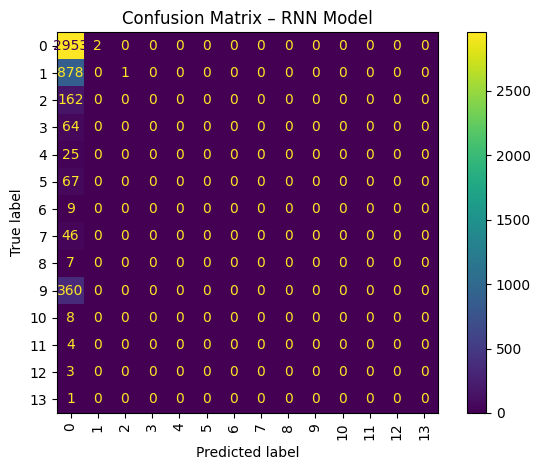

In [10]:
# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_cat, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical')
plt.title("Confusion Matrix – RNN Model")
plt.tight_layout()
plt.show()


# ✅ Final Summary – RNN Model for Weather Pattern Prediction

This notebook implemented a Recurrent Neural Network (RNN) using SimpleRNN layers to classify weather station patterns over time.

### Key Steps Performed:
- Loaded and reshaped weather data to match RNN input format: **(22950, 15, 9)**
- Converted label matrix to class indices and applied one-hot encoding
- Built an RNN model with the following architecture:
  - `SimpleRNN (64 units) → Dense (15 classes, softmax)`
- Trained for **10 epochs** with **batch size 16**, using categorical crossentropy
- Achieved:
  - **Training Accuracy:** ~64.7%
